# A Distribuição Chi-Quadrado
Se a variável aleatória $x$ tem uma distribuição normal com desvio padrão $\sigma$, então

\begin{align}
        \chi^2=\frac{(n-1)s^2}{\sigma^2}
\end{align}

resulta em uma distribuição qui-quadrado com $n – 1$ graus de liberdade, para amostras de qualquer tamanho $n > 1$.

No Python, usaremos o método *pdf* *(probability density function)* da classe *stats.chi2* (biblioteca *scipy*).

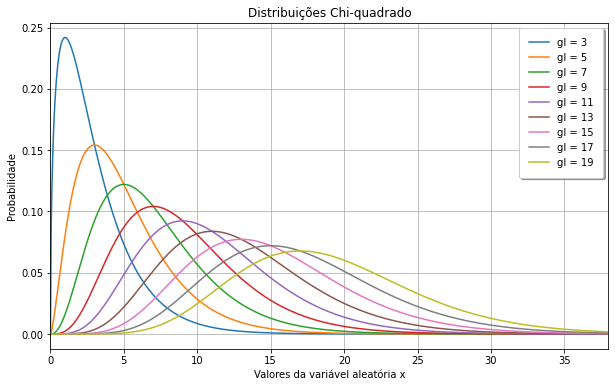

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
# Geração da lista de graus de liberdade para a visualização (de 3 a 19)
gl = list(range(3, 21, 2))
# Geração de QUANT pontos no intervalo entre INICIO e FIM
QUANT, INICIO, FIM = 750, 0, max(gl)*2
# Tamanho da figura
plt.figure(figsize=(10, 6))
# Plotagem dos gráficos
for grau in gl:
  # Determinação da distribuição chi-quadrado, com o correspondente gl
  chiquad = st.chi2(df=grau)
  x = np.linspace(INICIO, FIM, QUANT)
  # Determinação da função densidade de probabilidade
  y = chiquad.pdf(x)
  plt.plot(x, y, label='gl = '+ str(grau))
# Atributos do gráfico
plt.legend(frameon=True, fancybox=True, framealpha=1,
           shadow=True, borderpad=1)
plt.xlim(0, max(gl)*2)
plt.title('Distribuições Chi-quadrado')
plt.xlabel('Valores da variável aleatória x')
plt.ylabel('Probabilidade')
plt.grid(True)
plt.show()


Exercício: Encontre os valores críticos $\chi^2_R$
e $\chi^2_L$ para um intervalo de confiança
de 95% quando o tamanho da amostra é 18.

In [ ]:
# Criação da distribuição chi-quadrado com 17 grau de liberdade
AMOSTRAS = 18
distchi2 = st.chi2(df=AMOSTRAS-1)
# Nível de confiança
confianca = 0.95
# Determinação dos valores críticos
x2L = distchi2.ppf((1-confianca)/2)
x2R = distchi2.ppf((1+confianca)/2)
# Exibição dos valores
print(f'Valor crítico à esquerda = {x2L:.3f}')
print(f'Valor crítico à direita = {x2R:.3f}')

Valor crítico à esquerda = 7.564
Valor crítico à direita = 30.191


# Intervalos de Confiança para $\sigma^2$ e $\sigma$

Você seleciona aleatoriamente e pesa as 30 unidades de uma amostra de um antialérgico. O desvio padrão da amostra é de 1,20 miligrama. Supondo que os pesos são normalmente distribuídos, construa intervalos de confiança de 90% e 95% para a variância e o desvio padrão da população de pesos dos remédios.

In [ ]:
# Função para o cálculo do IC
def intconf_variancia(amostras, confianca, s_amostral):
  # Distribuição chi-quadrado
  distchi2 = st.chi2(df=amostras-1)
  # Determinação dos valores críticos
  x2L = distchi2.ppf((1-confianca)/2)
  x2R = distchi2.ppf((1+confianca)/2)
  # Extremos do IC para variância
  inf = (amostras-1)*s_amostral**2/x2R
  sup = (amostras-1)*s_amostral**2/x2L
  return (inf, sup)

# Intervalos de confiança
amostras, confianca, desvpad = 30, [0.95, 0.90], 1.20
# Lista de intervalos de confiança
ICsigma2 = [intconf_variancia(amostras, conf, desvpad) for conf in confianca]
# Exibição dos IC para variância e desvio padrão
for i in range(len(confianca)):
  print(f'- Nível de confiança de {confianca[i]*100}%:')
  print(f'Variância: ({ICsigma2[i][0]:.3f}, {ICsigma2[i][1]:.3f})')
  print(f'Desvio Padrão: ({ICsigma2[i][0]**0.5:.3f}, {ICsigma2[i][1]**0.5:.3f})')

- Nível de confiança de 95.0%:
Variância: (0.913, 2.602)
Desvio Padrão: (0.956, 1.613)
- Nível de confiança de 90.0%:
Variância: (0.981, 2.358)
Desvio Padrão: (0.991, 1.536)


**Exercício:** O puma é um dos mamíferos mais ameaçados da Terra. No sudeste dos Estados Unidos, a única população reprodutora (cerca de 100 indivíduos) pode ser encontrada no extremo sul da Flórida. A maioria dos pumas vive em:

1.   The Big Cypress National Preserve
2.   Everglades National Park
3.   The Florida Panther National Wildlife Refuge,

conforme o mapa na figura a seguir.

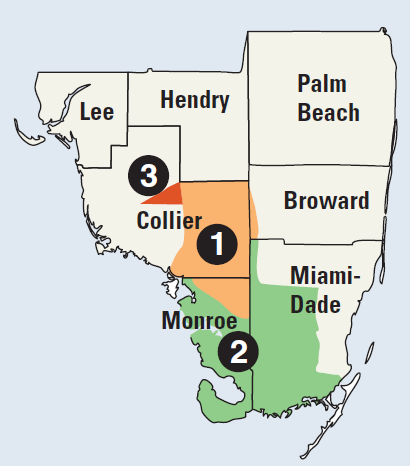

Em um estudo recente com 12 fêmeas da espécie, foi descoberto que o tamanho médio da ninhada era de 2,4 filhotes, com um desvio padrão de 0,9 (Fonte: *U.S. Fish & Wildlife Service*).

Construa um intervalo de confiança de 90% para o desvio
padrão do tamanho da ninhada das fêmeas do puma na Flórida. Suponha que os tamanhos das ninhadas são normalmente distribuídos.



In [ ]:
# Caracterização da amostra
amostras = 12
confianca = 0.9
desv_pad = 0.9
# Uso da função para cálculo de IC para a variância
ICsigma2 = intconf_variancia(amostras, confianca, desv_pad)
# Cálculo do IC para o desvio padrão
print(f'IC para o desvio padrão, confiança de {confianca*100}%:')
print(f'({ICsigma2[0]**0.5:.3f}, {ICsigma2[1]**0.5:.3f})')

IC para o desvio padrão, confiança de 90.0%:
(0.673, 1.396)
